# 非線形

## 多項式特徴量

In [6]:
import pandas as pd
import seaborn as sns
import ydata_profiling

df = sns.load_dataset('mpg')
df.profile_report()



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
df.dropna(inplace=True)
X = df[['horsepower']]
y = df['mpg']

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2, include_bias=False)
X_poly = poly.fit_transform(X)


In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


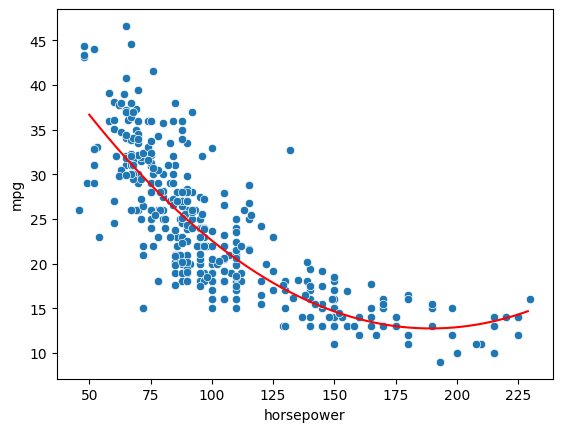

In [17]:
import numpy as np
import matplotlib.pyplot as plt
x_axis = np.arange(50, 230).reshape(-1, 1)
# x_axis_ = poly.fit_transform(x_axis)
x_axis_ = poly.transform(x_axis)
pred = model.predict(x_axis_)
sns.scatterplot(x=df['horsepower'], y=df['mpg'])
plt.plot(x_axis, pred, 'r')

In [19]:
model.intercept_

56.90009970211294

In [24]:
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.pipeline import Pipeline

degrees = [1, 2, 3]
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
results = {}
for d in degrees:
    pipeline = Pipeline([('poly', PolynomialFeatures(degree=d, include_bias=False)), ('linear', LinearRegression())])
    scores = cross_val_score(pipeline, X, y, scoring='neg_mean_squared_error', cv=cv)
    results[f"degree {d}"] = {'scores_mean': -np.mean(scores), 'scores_std': np.std(scores)}





In [25]:
pd.DataFrame(results)

,degree 1,degree 2,degree 3
scores_mean,24.235392,19.294970,19.433812
scores_std,3.346678,4.413627,4.508224


## KNN回帰

<Axes: xlabel='horsepower', ylabel='mpg'>

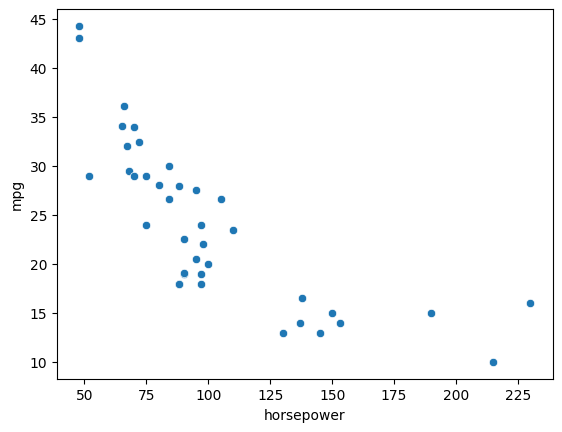

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0)
sns.scatterplot(x=X_train.squeeze(), y=y_train)

In [50]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=1)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


Text(0.5, 0, 'horsepower')

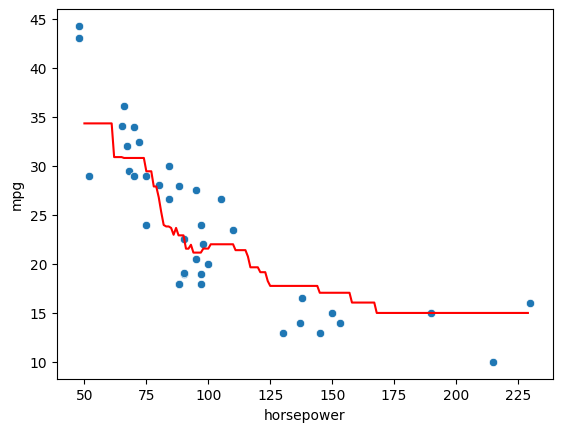

In [51]:
x_axis = np.arange(50, 230).reshape(-1, 1)
y_pred = model.predict(x_axis)
sns.scatterplot(x=X_train.squeeze(), y=y_train)
plt.plot(x_axis, y_pred, 'r')
plt.xlabel('horsepower')

In [55]:
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor

n_neighbors = list(range(1, 31))
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
score_list = []
for k in n_neighbors:
    model = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)
    score_list.append(-np.mean(scores))


In [56]:
print(f"Best performance: k={n_neighbors[np.argmin(score_list)]}, cv error={np.min(score_list)}")

Best performance: k=13, cv error=18.43521544402385


Text(0, 0.5, '5fold cv error(MSE)')

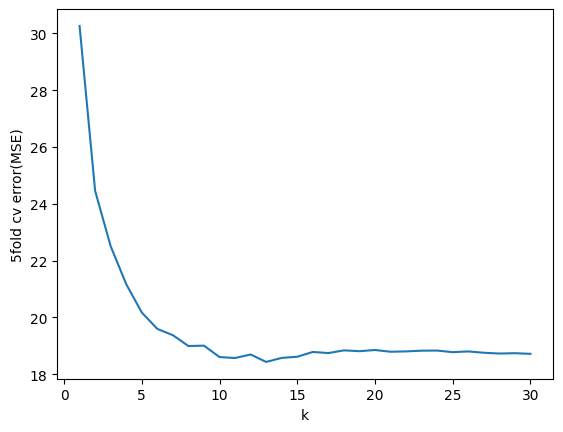

In [58]:
plt.plot(n_neighbors, score_list)
plt.xlabel('k')
plt.ylabel('5fold cv error(MSE)')  